# **NLP: Analysing text**

An attempt to use natural language processing to analyse accessions data



In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import pandas as pd


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df_acc = pd.read_excel('accessions_data_2023.xlsx')
df_acc.head()


Year  Archon Code     Repository Name                             Creator  \
0  2023            1  Bath Record Office  Bath & North East Somerset Council   
1  2023            1  Bath Record Office                   Bath City Council   
2  2023            1  Bath Record Office   West Country Writers' Association   
3  2023            1  Bath Record Office        Bath City Council and others   
4  2023            1  Bath Record Office                             Various   

                                         Description Covering Dates  \
0  Records associated with the death of HM Queen ...           2022   
1  Records of waterworks, water treatment and Cle...    1890s-2010s   
2                         Letters, accounts, minutes      2000-2016   
3                       Lease of the Pump Room, Bath           1810   
4  Deeds and other papers for properties in Bath ...      1825-1981   

  ISAD(G) Ref Quantity Accessioned Collection Additional Deposit  \
0      TR0080               0.5 linear metres                 No   
1        1413               0.5 linear metres                Yes   
2       0061D               0.5 linear metres                Yes   
3        1414                          1 item                 No   
4       0199G               0.5 linear metres                Yes   

  Collection Highlight  ... Quantity linear meters 1996 and earlier  \
0                   No  ...                                     NaN   
1                   No  ...                                     NaN   
2                   No  ...                                     NaN   
3                   No  ...                                     NaN   
4                   No  ...                                     NaN   

  Quantity MB 1996 and earlier Quantity linear meters 1996 to 2004  \
0                          NaN                                 NaN   
1                          NaN                                 NaN   
2                          NaN                                 NaN   
3                          NaN                                 NaN   
4                          NaN                                 NaN   

  Quantity MB 1996 to 2004 Quantity linear meters 2005 to present  \
0                      NaN                                    NaN   
1                      NaN                                    NaN   
2                      NaN                                    NaN   
3                      NaN                                    NaN   
4                      NaN                                    NaN   

  Quantity MB 2005 to present Mark Up Notes  Type Public Record  \
0                         NaN     NaN   NaN                 NaN   
1                         NaN     NaN   NaN                 NaN   
2                         NaN     NaN   NaN                 NaN   
3                         NaN     NaN   NaN                 NaN   
4                         NaN     NaN   NaN                 NaN   

   Eligible Payment  
0                No  
1                No  
2                No  
3                No  
4                No  

[5 rows x 24 columns]

In [5]:
#Brief outlline of the data:
df_acc.info()
df_acc.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     13501 non-null  int64  
 1   Archon Code                              13501 non-null  int64  
 2   Repository Name                          13501 non-null  object 
 3   Creator                                  12904 non-null  object 
 4   Description                              13398 non-null  object 
 5   Covering Dates                           13245 non-null  object 
 6   ISAD(G) Ref                              13180 non-null  object 
 7   Quantity Accessioned Collection          13166 non-null  object 
 8   Additional Deposit                       13501 non-null  object 
 9   Collection Highlight                     13501 non-null  object 
 10  URL Catalogue                            6459 

Year                                         int64
Archon Code                                  int64
Repository Name                             object
Creator                                     object
Description                                 object
Covering Dates                              object
ISAD(G) Ref                                 object
Quantity Accessioned Collection             object
Additional Deposit                          object
Collection Highlight                        object
URL Catalogue                               object
Keywords                                    object
Public Record                               object
Transferring Body                           object
Quantity linear meters 1996 and earlier     object
Quantity MB 1996 and earlier                object
Quantity linear meters 1996 to 2004         object
Quantity MB 1996 to 2004                    object
Quantity linear meters 2005 to present     float64
Quantity MB 2005 to present    

In [6]:
#extracting the description column of the dataset
all_text = df_acc['Description'].to_string()

#text = df['Description'].str.replace(r'[^\w\s]+', '').to_string()

df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     13501 non-null  int64  
 1   Archon Code                              13501 non-null  int64  
 2   Repository Name                          13501 non-null  object 
 3   Creator                                  12904 non-null  object 
 4   Description                              13398 non-null  object 
 5   Covering Dates                           13245 non-null  object 
 6   ISAD(G) Ref                              13180 non-null  object 
 7   Quantity Accessioned Collection          13166 non-null  object 
 8   Additional Deposit                       13501 non-null  object 
 9   Collection Highlight                     13501 non-null  object 
 10  URL Catalogue                            6459 

In [7]:
#1. Segmentation:
#Breaking the text down to sentences
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(all_text)
#print(sentences[0])
len(sentences)


979

In [8]:
#2. Tokenization:
#Extracting words as tokens
from nltk.tokenize import word_tokenize
all_tokens = nltk.word_tokenize(all_text)
print(len(all_tokens))


114660


In [9]:
#Extracting the word tokens of the first sentence

sentence1 = sentences[0]
tokens_sentence1 = word_tokenize(sentence1)
print(tokens_sentence1)
print(len(tokens_sentence1))

['0', 'Records', 'associated', 'with', 'the', 'death', 'of', 'HM', 'Queen', '...', '1', 'Records', 'of', 'waterworks', ',', 'water', 'treatment', 'and', 'Cle', '...', '2', 'Letters', ',', 'accounts', ',', 'minutes', '3', 'Lease', 'of', 'the', 'Pump', 'Room', ',', 'Bath', '4', 'Deeds', 'and', 'other', 'papers', 'for', 'properties', 'in', 'Bath', '...', '5', 'Photographs', 'of', 'the', 'Royal', 'Mineral', 'Water', 'Hospita', '...', '6', 'Talk', 'on', 'the', 'Hungerford', 'family', ';', 'family', 'tree', ';', 'ph', '...', '7', 'Audio', 'files', 'of', 'episodes', 'of', "'They", 'remember', 'HIM', "'", '...', '8', 'Minutes', ',', 'newsletters', ',', 'posters', ',', 'ephemera', '9', 'Harcourt', 'Masters', "'", 'estate', 'map', 'of', 'Priston', ',', 'busin', '...', '10', 'Deeds', ',', 'maps', 'and', 'building', 'plans', 'mostly', 'relating', '...', '11', 'Research', 'notes', ',', 'reports', ',', 'books', ',', 'journals', 'and', 'm', '...', '12', 'Records', 'of', 'the', 'A', 'Century', "'s", '

In [10]:
#3. Parts of speech (POS):
#Identifying the parts of speech of each word
nltk.pos_tag(tokens_sentence1)

[('0', 'CD'),
 ('Records', 'NNS'),
 ('associated', 'VBN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('death', 'NN'),
 ('of', 'IN'),
 ('HM', 'NNP'),
 ('Queen', 'NNP'),
 ('...', ':'),
 ('1', 'CD'),
 ('Records', 'NNS'),
 ('of', 'IN'),
 ('waterworks', 'NN'),
 (',', ','),
 ('water', 'NN'),
 ('treatment', 'NN'),
 ('and', 'CC'),
 ('Cle', 'NNP'),
 ('...', ':'),
 ('2', 'CD'),
 ('Letters', 'NNS'),
 (',', ','),
 ('accounts', 'NNS'),
 (',', ','),
 ('minutes', 'NNS'),
 ('3', 'CD'),
 ('Lease', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Pump', 'NNP'),
 ('Room', 'NNP'),
 (',', ','),
 ('Bath', 'NNP'),
 ('4', 'CD'),
 ('Deeds', 'NNP'),
 ('and', 'CC'),
 ('other', 'JJ'),
 ('papers', 'NNS'),
 ('for', 'IN'),
 ('properties', 'NNS'),
 ('in', 'IN'),
 ('Bath', 'NNP'),
 ('...', ':'),
 ('5', 'CD'),
 ('Photographs', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Royal', 'NNP'),
 ('Mineral', 'NNP'),
 ('Water', 'NNP'),
 ('Hospita', 'NNP'),
 ('...', ':'),
 ('6', 'CD'),
 ('Talk', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('Hungerford'

In [11]:
# Using SpaCy to extract and explain POS
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence1)
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.is_stop)

0 0 NUM False
                SPACE False
Records Records PROPN False
associated associate VERB False
with with ADP True
the the DET True
death death NOUN False
of of ADP True
HM HM PROPN False
Queen Queen PROPN False
... ... PUNCT False

 
 SPACE False
1 1 NUM False
                SPACE False
Records Records PROPN False
of of ADP True
waterworks waterworks NOUN False
, , PUNCT False
water water NOUN False
treatment treatment NOUN False
and and CCONJ True
Cle Cle PROPN False
... ... PUNCT False

 
 SPACE False
2 2 NUM False
                                                              SPACE False
Letters letter NOUN False
, , PUNCT False
accounts account NOUN False
, , PUNCT False
minutes minute NOUN False

 
 SPACE False
3 3 NUM False
                                                          SPACE False
Lease Lease PROPN False
of of ADP True
the the DET True
Pump Pump PROPN False
Room Room PROPN False
, , PUNCT False
Bath Bath PROPN False

 
 SPACE False
4 4 NUM False
               

In [12]:
import pandas as pd
cols = ("text", "POS", "explain", "stopword")
rows = []
for t in doc:
    row = [t.text, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)

df

text    POS      explain  stopword
0               0    NUM      numeral     False
1                  SPACE        space     False
2         Records  PROPN  proper noun     False
3      associated   VERB         verb     False
4            with    ADP   adposition      True
...           ...    ...          ...       ...
1127           of    ADP   adposition      True
1128  Jehoshaphat  PROPN  proper noun     False
1129        Lodge  PROPN  proper noun     False
1130           No  PROPN  proper noun      True
1131            .  PUNCT  punctuation     False

[1132 rows x 4 columns]

In [13]:
df['explain'].value_counts()
# transforming this to a dataframe allows a closer look at the make up of the text
# much of this sample of descriptions are made up of proper nouns and nouns, with verbs acounting for relatively little of the text

noun                        223
proper noun                 216
space                       199
punctuation                 199
numeral                     107
adposition                   76
verb                         29
coordinating conjunction     26
determiner                   22
adjective                    16
particle                      9
pronoun                       5
adverb                        2
auxiliary                     2
symbol                        1
Name: explain, dtype: int64

In [14]:
#4. Stemming and Lemmatization:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for w in word_tokenize(sentences[0]):
    rootWord=ps.stem(w)
    print(rootWord)

0
record
associ
with
the
death
of
hm
queen
...
1
record
of
waterwork
,
water
treatment
and
cle
...
2
letter
,
account
,
minut
3
leas
of
the
pump
room
,
bath
4
deed
and
other
paper
for
properti
in
bath
...
5
photograph
of
the
royal
miner
water
hospita
...
6
talk
on
the
hungerford
famili
;
famili
tree
;
ph
...
7
audio
file
of
episod
of
'they
rememb
him
'
...
8
minut
,
newslett
,
poster
,
ephemera
9
harcourt
master
'
estat
map
of
priston
,
busin
...
10
deed
,
map
and
build
plan
mostli
relat
...
11
research
note
,
report
,
book
,
journal
and
m
...
12
record
of
the
a
centuri
's
memori
project
-
...
13
map
,
photograph
,
newslett
,
poster
,
annua
...
14
minut
,
correspond
,
associ
with
bath
...
15
scrapbook
,
minut
,
correspond
,
poster
,
...
16
financi
record
17
constitut
,
minut
,
correspond
,
account
...
18
report
,
correspond
and
document
of
the
w
...
19
includ
deed
,
probat
document
,
tax
record
...
20
minut
of
full
council
,
cabinet
and
some
comm
...
21
correspond
and
research
note
con

In [15]:
# Stemming provides the root stem of a word, which can help im retrieving related terms or information
# however, the morphological variants Porter Stemmer produces are not always real words, and it can return meanings or spellings that can look like they relate words other than the original root word
# lemmatization can therefore be more accurate, as it converts the word to it's base form. But lemmatisation takes longer
ps = PorterStemmer()
word_freq = dict()

for w in word_tokenize(sentence1):
    rootWord=ps.stem(w)

    # Create an empty dictionary

    if rootWord not in word_freq:
            word_freq[rootWord] = 1
    else:
            word_freq[rootWord] += 1
print(word_freq)

{'0': 1, 'record': 11, 'associ': 2, 'with': 2, 'the': 15, 'death': 2, 'of': 41, 'hm': 1, 'queen': 1, '...': 82, '1': 1, 'waterwork': 1, ',': 76, 'water': 2, 'treatment': 1, 'and': 25, 'cle': 1, '2': 1, 'letter': 2, 'account': 4, 'minut': 24, '3': 1, 'leas': 1, 'pump': 1, 'room': 1, 'bath': 4, '4': 1, 'deed': 6, 'other': 1, 'paper': 5, 'for': 9, 'properti': 2, 'in': 3, '5': 1, 'photograph': 19, 'royal': 2, 'miner': 1, 'hospita': 1, '6': 1, 'talk': 1, 'on': 2, 'hungerford': 1, 'famili': 4, ';': 27, 'tree': 2, 'ph': 1, '7': 1, 'audio': 1, 'file': 2, 'episod': 1, "'they": 1, 'rememb': 1, 'him': 1, "'": 4, '8': 2, 'newslett': 8, 'poster': 4, 'ephemera': 2, '9': 1, 'harcourt': 1, 'master': 1, 'estat': 1, 'map': 4, 'priston': 1, 'busin': 1, '10': 1, 'build': 1, 'plan': 3, 'mostli': 1, 'relat': 7, '11': 1, 'research': 2, 'note': 2, 'report': 7, 'book': 3, 'journal': 4, 'm': 4, '12': 1, 'a': 9, 'centuri': 1, "'s": 4, 'memori': 3, 'project': 1, '-': 2, '13': 2, 'annua': 1, '14': 1, 'correspond':

In [16]:
# Lemmatization: aims to resolve words to their dictionary form; stems returned through lemmatization are semantically complete
# This can be useful in analysing word usage in a corpus, and considering how this has changed over time
import nltk
nltk.download('wordnet')
nltk.pos_tag(tokens_sentence1)
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

for token in word_tokenize(sentence1):
  print(lemmatizer.lemmatize(token,  pos ="v"))


[nltk_data] Downloading package wordnet to /root/nltk_data...


0
Records
associate
with
the
death
of
HM
Queen
...
1
Records
of
waterworks
,
water
treatment
and
Cle
...
2
Letters
,
account
,
minutes
3
Lease
of
the
Pump
Room
,
Bath
4
Deeds
and
other
paper
for
properties
in
Bath
...
5
Photographs
of
the
Royal
Mineral
Water
Hospita
...
6
Talk
on
the
Hungerford
family
;
family
tree
;
ph
...
7
Audio
file
of
episodes
of
'They
remember
HIM
'
...
8
Minutes
,
newsletters
,
posters
,
ephemera
9
Harcourt
Masters
'
estate
map
of
Priston
,
busin
...
10
Deeds
,
map
and
build
plan
mostly
relate
...
11
Research
note
,
report
,
book
,
journals
and
m
...
12
Records
of
the
A
Century
's
Memories
Project
-
...
13
Maps
,
photograph
,
newsletters
,
posters
,
annua
...
14
Minutes
,
correspondence
,
association
with
Bath
...
15
Scrapbooks
,
minutes
,
correspondence
,
posters
,
...
16
Financial
record
17
Constitution
,
minutes
,
correspondence
,
account
...
18
Reports
,
correspondence
and
document
of
the
W
...
19
Includes
deeds
,
probate
document
,
tax
record
...
20
Minutes

In [17]:
#Lematization with SpaCy
#SpaCy has a lemma_ atribute, which makes lemmatization very easy, though NLTK is more customisable
doc = nlp(sentence1)
for token in doc:
    print(token.text + '  ===>', token.lemma_)

0  ===> 0
         ===>        
Records  ===> Records
associated  ===> associate
with  ===> with
the  ===> the
death  ===> death
of  ===> of
HM  ===> HM
Queen  ===> Queen
...  ===> ...

  ===> 

1  ===> 1
         ===>        
Records  ===> Records
of  ===> of
waterworks  ===> waterworks
,  ===> ,
water  ===> water
treatment  ===> treatment
and  ===> and
Cle  ===> Cle
...  ===> ...

  ===> 

2  ===> 2
                                ===>                               
Letters  ===> letter
,  ===> ,
accounts  ===> account
,  ===> ,
minutes  ===> minute

  ===> 

3  ===> 3
                              ===>                             
Lease  ===> Lease
of  ===> of
the  ===> the
Pump  ===> Pump
Room  ===> Room
,  ===> ,
Bath  ===> Bath

  ===> 

4  ===> 4
         ===>        
Deeds  ===> deed
and  ===> and
other  ===> other
papers  ===> paper
for  ===> for
properties  ===> property
in  ===> in
Bath  ===> Bath
...  ===> ...

  ===> 

5  ===> 5
         ===>        
Photographs  ===> Phot

In [18]:
# Stopword identification:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize

filtered_text = []

for w in all_tokens:
    if w not in stop_words:
        filtered_text.append(w)
print(filtered_text)

['0', 'Records', 'associated', 'death', 'HM', 'Queen', '...', '1', 'Records', 'waterworks', ',', 'water', 'treatment', 'Cle', '...', '2', 'Letters', ',', 'accounts', ',', 'minutes', '3', 'Lease', 'Pump', 'Room', ',', 'Bath', '4', 'Deeds', 'papers', 'properties', 'Bath', '...', '5', 'Photographs', 'Royal', 'Mineral', 'Water', 'Hospita', '...', '6', 'Talk', 'Hungerford', 'family', ';', 'family', 'tree', ';', 'ph', '...', '7', 'Audio', 'files', 'episodes', "'They", 'remember', 'HIM', "'", '...', '8', 'Minutes', ',', 'newsletters', ',', 'posters', ',', 'ephemera', '9', 'Harcourt', 'Masters', "'", 'estate', 'map', 'Priston', ',', 'busin', '...', '10', 'Deeds', ',', 'maps', 'building', 'plans', 'mostly', 'relating', '...', '11', 'Research', 'notes', ',', 'reports', ',', 'books', ',', 'journals', '...', '12', 'Records', 'A', 'Century', "'s", 'Memories', 'Project', '-', '...', '13', 'Maps', ',', 'photographs', ',', 'newsletters', ',', 'posters', ',', 'annua', '...', '14', 'Minutes', ',', 'corr

<ipython-input-19-635f150c2cd0>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  text1 = df_f['Desc'].str.replace(r'[^\w\s]+', '').str.lower().to_string()#to remove punctuation for the graph


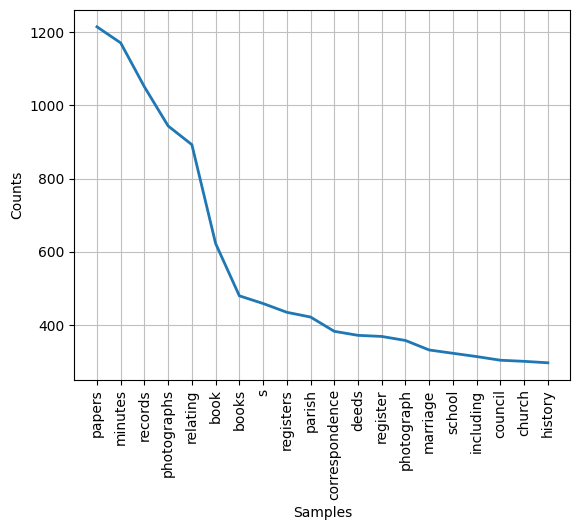

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
# Removing stopwords allows us to see the most common relevant words in the text,
# these can then be plotted on a graph to measure frequency

from nltk import FreqDist
df_f = pd.DataFrame(filtered_text, columns =['Desc'])

text1 = df_f['Desc'].str.replace(r'[^\w\s]+', '').str.lower().to_string()#to remove punctuation for the graph
#print(text1)
tokens1 = nltk.word_tokenize(text1)
fdist = FreqDist(tokens1)
fdist.plot(20)

['1', 'papers', 'minutes', 'photographs', 'relating', 'book', 'records', 'correspondence', 'including', 'file', 'register', 'books', 'photographic', 'albums', 'prints', 'bri', 'p', 'b', 'r', 'agm', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', 'th', 'meeting', 'meetings', 'album', 'magazine', 'magazines', 'nan', 'newsletters', 'add', 'dep', 'related', 'slides', 'registers', 'photograph', 'committee', 'accounts', 'reports', 'plans', 'deeds', 'fil

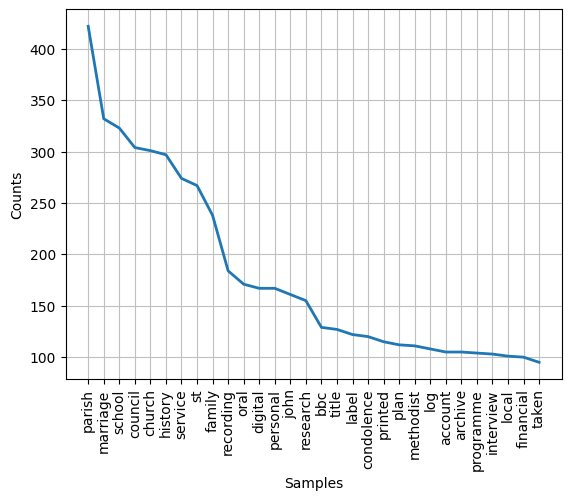

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
# The graph shows that there are many common words used in archival descriptions, that, while important, are too prevalent to allow a closer view of what the records are really about
# so we can create a new stopword list (with words such as papers and records) and add this to the NLTK stopwords
# this will allow a clearer view of the most common themes

stop_words = set(stopwords.words('english'))

fileWords = open("extra stopwords.txt")
line = fileWords.read()
filestop = line.split()
#print(filestop)

filestop.extend(stop_words)
print(filestop)

filtered_text1 = []
for w in tokens1:
    if w not in filestop:
        filtered_text1.append(w)
print(filtered_text1)
fdist = FreqDist(filtered_text1)
fdist.plot(30)


In [22]:
# The concordance allows us to see the context of words in the text
# for example, 'digital' seems to largely refer to copies or images
text2 = nltk.Text(all_tokens)
text2.concordance('digital', width=150, lines=60)


Displaying 60 of 167 matches:
ces , m ... 116 Letters of Thomas William Fake written home du ... 117 Digital files of 1970s Bristol Channel TV prog ... 118 Personal papers of a fo
e registers 153 Mounted photographs of Connaught Road Boys Sch ... 154 Digital photographs of the proclamation of Kin ... 155 Photographs of the Lord
ames at Windsor : photograph of launch 306 Geoff Shingles ' records of Digital Equipment C ... 307 records 308 Reading : miscellaneous photograph alb
Reading : photographs of Rosser family 338 photograph and leaflets 339 digital records 340 Hall Place Farm , Tilehurst : farming stock valu ... 341 C
357 Discover our Culture and Tradition Heritage Pr ... 358 Emmer Green Digital Archive : photographs 359 newsletters 360 programme 361 parish records
rs 176 ... 707 Loose minutes 1997-2017 ; attendance books 1977 ... 708 Digital files relating to the Next Steps Build ... 709 Condolence book 710 Bra
 ... 819 Personal papers , correspondence , subject files ... 820 Born

In [23]:
text2.concordance('court', width=100, lines=50)
#'court' refers mostly to court registers, but also includes manorial documents (court book, court Leet, court roll)

Displaying 50 of 75 matches:
ating to 62 Langton Par ... 107 Film of Ashton Court Car Rally 108 Sunday School minutes and report
ook handwritten by Michael Henry Clark ... 185 Court registers 186 Inquest files , annual returns 1
ges book 286 records of Bracknell New Town 287 Court registers 288 Court registers 289 Court regist
 of Bracknell New Town 287 Court registers 288 Court registers 289 Court registers 290 Court regist
wn 287 Court registers 288 Court registers 289 Court registers 290 Court registers 291 Court regist
rs 288 Court registers 289 Court registers 290 Court registers 291 Court registers 292 Court regist
rs 289 Court registers 290 Court registers 291 Court registers 292 Court registers 293 Court regist
rs 290 Court registers 291 Court registers 292 Court registers 293 Court registers 294 Court regist
rs 291 Court registers 292 Court registers 293 Court registers 294 Court registers 295 Court regist
rs 292 Court registers 293 Court registers 294 Court registers 295 Cour

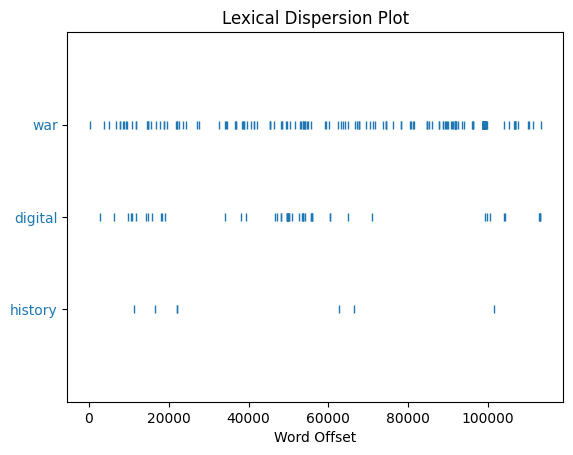

In [24]:
import matplotlib.pyplot as plt
text2.dispersion_plot(['history', 'digital', 'war'])
#a dispersion plot can show where words are located in the text. This isn't so useful for accessions data, but does help show density, and this would be interesting for analysing historical texts

In [27]:
#finding words with a similar range of context:
print(text2.similar('church'))
print('--------')
print(text2.similar('war'))

parish minutes and accounts records the papers registers magazines
business council society of letters deeds photographs building plans
reports correspondence
None
--------
c properties maps a burials her latham celebrations events articles
service children property land house luton farm cottage buildings an
None


In [28]:
# extracting words that often go together within the text
text2.collocations()

# This helps us to see additional context. For example, we can see that war often refers specifically to the world wars, and marriage relates to specific documents - marriage registers

BBC Recording; service label; Recording service; Oral history;
Marriage registers; history interview; Title deeds; Marriage register;
Parish Council; Papers relating; Minute books; additional deposit;
parish records; Video footage; Queen Elizabeth; Personal papers;
Photograph album; World War; footage taken; Council minutes


In [29]:
#6. Dependency Parsing: extracting relationships
doc = nlp(sentence1)
for token in doc:
    print(token.text, ':',  token.pos_, ':', token.dep_)


0 : NUM : nummod
        : SPACE : dep
Records : PROPN : nsubj
associated : VERB : acl
with : ADP : prep
the : DET : det
death : NOUN : pobj
of : ADP : prep
HM : PROPN : compound
Queen : PROPN : pobj
... : PUNCT : punct

 : SPACE : dep
1 : NUM : nummod
        : SPACE : dep
Records : PROPN : appos
of : ADP : prep
waterworks : NOUN : pobj
, : PUNCT : punct
water : NOUN : compound
treatment : NOUN : conj
and : CCONJ : cc
Cle : PROPN : compound
... : PUNCT : punct

 : SPACE : dep
2 : NUM : nummod
                               : SPACE : dep
Letters : NOUN : conj
, : PUNCT : punct
accounts : NOUN : conj
, : PUNCT : punct
minutes : NOUN : conj

 : SPACE : dep
3 : NUM : nummod
                             : SPACE : dep
Lease : PROPN : appos
of : ADP : prep
the : DET : det
Pump : PROPN : compound
Room : PROPN : pobj
, : PUNCT : punct
Bath : PROPN : nmod

 : SPACE : dep
4 : NUM : punct
        : SPACE : dep
Deeds : NOUN : conj
and : CCONJ : cc
other : ADJ : amod
papers : NOUN : conj
for : ADP 

In [30]:
# extracting noun chunks ...
for chunk in doc.noun_chunks:
    print(chunk.text)

0        Records
the death
HM Queen
1        Records
waterworks
water treatment
Cle...
2                               Letters
accounts
minutes
3                             Lease
the Pump Room
Bath
4        Deeds
other papers
properties
Bath
5        Photographs
the Royal Mineral Water Hospita
6        Talk
the Hungerford family
family tree
ph
7        Audio files
episodes
They
HIM
9        Harcourt Masters' estate map
Priston
busin
10       Deeds
maps
building
11       Research notes
reports
books
journals
m
12       Records
the A Century's Memories Project
13       Maps
photographs
newsletters
posters
14       Minutes
correspondence
association
Bath
15       Scrapbooks
minutes
correspondence
posters
16                                       Financial records
17       Constitution
minutes
correspondence
account
18       Reports
correspondence
documents
the W
deeds
20       Minutes
Full Council
Cabinet
some comm
...
21       Correspondence and research notes
t
22       Annual reports
n

In [31]:
#... and showing their dependencies
for token in doc:
    print(token.text, ':', token.dep_, ':', token.head.text, ':', token.head.pos_,
            [child for child in token.children])

0 : nummod : Records : PROPN [       ]
        : dep : 0 : NUM []
Records : nsubj : remember : VERB [0, associated, ..., Records, ..., Talk, ;, tree, Counci]
associated : acl : Records : PROPN [with]
with : prep : associated : VERB [death]
the : det : death : NOUN []
death : pobj : with : ADP [the, of]
of : prep : death : NOUN [Queen]
HM : compound : Queen : PROPN []
Queen : pobj : of : ADP [HM]
... : punct : Records : PROPN [
]

 : dep : ... : PUNCT []
1 : nummod : Records : PROPN [       ]
        : dep : 1 : NUM []
Records : appos : Records : PROPN [1, of, ,, minutes, ..., Photographs]
of : prep : Records : PROPN [waterworks]
waterworks : pobj : of : ADP [,, treatment]
, : punct : waterworks : NOUN []
water : compound : treatment : NOUN []
treatment : conj : waterworks : NOUN [water, and, Letters]
and : cc : treatment : NOUN []
Cle : compound : Letters : NOUN []
... : punct : Letters : NOUN [
]

 : dep : ... : PUNCT []
2 : nummod : Letters : NOUN [                              ]
   

In [32]:
from spacy.symbols import nsubj, VERB
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{given, Includes, funding, remember, works, entitled, appea}


In [33]:
import pandas as pd
cols = ("text", "POS", "explain POS", "dependency", "explain dep", "stopword")
rows = []
for token in doc:
    row = [token.text, token.pos_, spacy.explain(token.pos_), token.dep_, spacy.explain(token.dep_), token.is_stop]
    rows.append(row)
d_df = pd.DataFrame(rows, columns=cols)
d_df.head(30)
# SpaCy is fairly good at extracting POS and the related dependency, though does tend to over-predict proper nouns - possibly because of the extensive use of capitalisation (and the use of capitalised case) in the text

text    POS               explain POS  \
0                                0    NUM                   numeral   
1                                   SPACE                     space   
2                          Records  PROPN               proper noun   
3                       associated   VERB                      verb   
4                             with    ADP                adposition   
5                              the    DET                determiner   
6                            death   NOUN                      noun   
7                               of    ADP                adposition   
8                               HM  PROPN               proper noun   
9                            Queen  PROPN               proper noun   
10                             ...  PUNCT               punctuation   
11                              \n  SPACE                     space   
12                               1    NUM                   numeral   
13                                  SPACE                     space   
14                         Records  PROPN               proper noun   
15                              of    ADP                adposition   
16                      waterworks   NOUN                      noun   
17                               ,  PUNCT               punctuation   
18                           water   NOUN                      noun   
19                       treatment   NOUN                      noun   
20                             and  CCONJ  coordinating conjunction   
21                             Cle  PROPN               proper noun   
22                             ...  PUNCT               punctuation   
23                              \n  SPACE                     space   
24                               2    NUM                   numeral   
25                                  SPACE                     space   
26                         Letters   NOUN                      noun   
27                               ,  PUNCT               punctuation   
28                        accounts   NOUN                      noun   
29                               ,  PUNCT               punctuation   

   dependency                                   explain dep  stopword  
0      nummod                              numeric modifier     False  
1         dep                        unclassified dependent     False  
2       nsubj                               nominal subject     False  
3         acl  clausal modifier of noun (adjectival clause)     False  
4        prep                        prepositional modifier      True  
5         det                                    determiner      True  
6        pobj                         object of preposition     False  
7        prep                        prepositional modifier      True  
8    compound                                      compound     False  
9        pobj                         object of preposition     False  
10      punct                                   punctuation     False  
11        dep                        unclassified dependent     False  
12     nummod                              numeric modifier     False  
13        dep                        unclassified dependent     False  
14      appos                         appositional modifier     False  
15       prep                        prepositional modifier      True  
16       pobj                         object of preposition     False  
17      punct                                   punctuation     False  
18   compound                                      compound     False  
19       conj                                      conjunct     False  
20         cc                      coordinating conjunction      True  
21   compound                                      compound     False  
22      punct                                   punctuation     False  
23        dep                        unclassified dependent     False  
24     nummod               

In [34]:
# Visualising dependancy parsing
from spacy import displacy

doc = nlp(sentence1)
displacy.render(doc, style="dep", jupyter=True)

In [35]:
#7. Name Entity Recognition:
# Extracting and classifying specific entities (persons, places, organisations etc.) within the text
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(sentence1)
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["NORP", "GPE", "LOC", "EVENTS", "PERSON", "ORG"], "colors": colors} #limiting the ents to those most relevant to the text
displacy.render(doc, style="ent", jupyter=True, options=options)

# SpaCy can produce a nice visualisation, colour coding the named entities. While this looks nice, it is less useful for a very long text
# but there are definite limitations with NER with this type of text


In [36]:
# counting the values classified under each entity and extracting the most common values
from collections import Counter
doc = nlp(all_text)
labels = [ent.ent_type_ for item in doc.ents for ent in item]
print(Counter(labels))

items = [(ent.ent_type_, ent.text) for item in doc.ents for ent in item]
Counter(items).most_common(5)

# It's not all that precise, classifying photographs as organisations (just as it sometimes assigned them proper nouns)

Counter({'DATE': 11572, 'PERSON': 6749, 'ORG': 5932, 'CARDINAL': 3207, 'WORK_OF_ART': 2267, 'GPE': 1155, 'QUANTITY': 941, 'TIME': 665, 'FAC': 567, 'LOC': 362, 'PRODUCT': 342, 'NORP': 300, 'EVENT': 201, 'MONEY': 72, 'ORDINAL': 64, 'LAW': 55, 'PERCENT': 52, 'LANGUAGE': 11})


[(('DATE', '-'), 791),
 (('PERSON', '\n'), 267),
 (('PERSON', '...'), 246),
 (('ORG', 'the'), 242),
 (('QUANTITY', '     '), 173)]

In [44]:
# transforming the entity information to a dataframe to explore it farther
import pandas as pd

doc = nlp(all_text)

cols = ("Text", "Entity Type", "Explain Ent Type", "IOB code")
rows = []

entities = [(ent.text, ent.ent_type_, spacy.explain(ent.ent_type_), ent.ent_iob_)for item in doc.ents for ent in item]
#https://stackoverflow.com/questions/53755893/facing-attributeerror-for-tag-using-spacy-in-python

df_ent = pd.DataFrame(entities, columns=cols, index=None)
df_ent.head(40)



Text Entity Type  \
0                   0    CARDINAL   
1                 Cle      PERSON   
2                   2    CARDINAL   
3                Bath      PERSON   
4                   5    CARDINAL   
5                 the         ORG   
6               Royal         ORG   
7             Mineral         ORG   
8               Water         ORG   
9             Hospita         ORG   
10         Hungerford      PERSON   
11                  8        TIME   
12                           TIME   
13            Minutes        TIME   
14                  9    CARDINAL   
15            Priston         ORG   
16                 11    CARDINAL   
17                 12    CARDINAL   
18            Century        DATE   
19                 13    CARDINAL   
20                 15    CARDINAL   
21                 16    CARDINAL   
22                 17    QUANTITY   
23                       QUANTITY   
24       Constitution    QUANTITY   
25                 18    CARDINAL   
26                 19    CARDINAL   
27                 20        TIME   
28                           TIME   
29            Minutes        TIME   
30            Cabinet         ORG   
31                 21    CARDINAL   
32                 22    CARDINAL   
33             Annual        DATE   
34                the         ORG   
35               Bath         ORG   
36             Postal         ORG   
37             Museum         ORG   
38                 po      PERSON   
39                ...      PERSON   

                                Explain Ent Type IOB code  
0   Numerals that do not fall under another type        B  
1                    People, including fictional        B  
2   Numerals that do not fall under another type        B  
3                    People, including fictional        B  
4   Numerals that do not fall under another type        B  
5        Companies, agencies, institutions, etc.        B  
6        Companies, agencies, institutions, etc.        I  
7        Companies, agencies, institutions, etc.        I  
8        Companies, agencies, institutions, etc.        I  
9        Companies, agencies, institutions, etc.        I  
10                   People, including fictional        B  
11                      Times smaller than a day        B  
12                      Times smaller than a day        I  
13                      Times smaller than a day        I  
14  Numerals that do not fall under another type        B  
15       Companies, agencies, institutions, etc.        B  
16  Numerals that do not fall under another type        B  
17  Numerals that do not fall under another type        B  
18         Absolute or relative dates or periods        B  
19  Numerals that do not fall under another type        B  
20  Numerals that do not fall under another type        B  
21  Numerals that do not fall under another type        B  
22        Measurements, as of weight or distance        B  
23        Measurements, as of weight or distance        I  
24        Measurements, as of weight or distance        I  
25  Numerals that do not fall under another type        B  
26  Numerals that do not fall under another type        B  
27                      Times smaller than a day        B  
28                      Times smaller than a day        I  
29                      Times smaller than a day        I  
30       Companies, agencies, institutions, etc.        B  
31  Numerals that do not fall under another type        B  
32  Numerals that do not fall under another type        B  
33         Absolute or relative dates or periods        B  
34       Companies, agencies, institutions, etc.        B  
35       Companies, agencies, institutions, etc.        I  
36       Companies, agencies, institutions, etc.        I  
37       Companies, agencies, institutions, etc.        I  
38                   People, including fictional        B  
39                   People, including fictional        I

In [42]:
df_ent["Entity Type"].value_counts()

DATE           11572
PERSON          6749
ORG             5932
CARDINAL        3207
WORK_OF_ART     2267
GPE             1155
QUANTITY         941
TIME             665
FAC              567
LOC              362
PRODUCT          342
NORP             300
EVENT            201
MONEY             72
ORDINAL           64
LAW               55
PERCENT           52
LANGUAGE          11
Name: Entity Type, dtype: int64

In [40]:
df_ent.groupby("Entity Type").count().filter(["Text"])  #or as a dataframe

Text
Entity Type       
CARDINAL      3207
DATE         11572
EVENT          201
FAC            567
GPE           1155
LANGUAGE        11
LAW             55
LOC            362
MONEY           72
NORP           300
ORDINAL         64
ORG           5932
PERCENT         52
PERSON        6749
PRODUCT        342
QUANTITY       941
TIME           665
WORK_OF_ART   2267

In [43]:

df_norp = df_ent.loc[df_ent["Entity Type"]== "NORP"].filter(["Text"]).value_counts()
df_norp.head(20)

# The default model in SpaCy doesn't quite work for accessions data.
# The data contains a lot of lists of words and large mix of entities, some of which change depending on context.
# The ideal would be to train a new model using previous accessions data.
# It does pick up quite a few correct entities, but also includes a few oddities (like Photographs as NORP - Nationalities or religious or political groups), and also classifies minutes as time rather than in the context of notes from meetings

Text       
Parish         75
British        14
Photographs     8
German          7
Scottish        7
French          5
Albans          4
Methodist       3
Anglican        3
Baptist         3
West            3
Caithness       3
Coronation      3
Diocese         3
St              2
Spanish         2
South           2
Cheshunt        2
Jewish          2
Severn          2
dtype: int64

In [45]:
df_gpe = df_ent.loc[df_ent["Entity Type"]== "GPE"].filter(["Text"]).value_counts()
df_gpe.head(15)
#There are a lot of place-names in the dataset, many of which aren't recognised

Text     
Timewatch    34
Rocket       34
\n           17
...          15
the          14
North        12
West         11
of           11
London        9
UK            9
County        9
England       9
Jersey        8
New           7
NaN           7
dtype: int64

In [46]:
df_event = df_ent.loc[df_ent["Entity Type"]== "EVENT"].filter(["Text"]).value_counts()
df_event.head(15)

Text                                          
War                                               25
World                                             21
Minutes                                           15
the                                               13
First                                              7
WWII                                               6
Monthly                                            5
Day                                                4
Meetings                                           4
II                                                 4
                                                   4
Occupation                                         3
Great                                              3
                                                   3
                                                   3
dtype: int64

<ipython-input-47-e46999c247d9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  text_ent = df_org['Text'].str.replace(r'[^\w\s]+', '').str.lower().to_string()#to remove punctuation for the graph


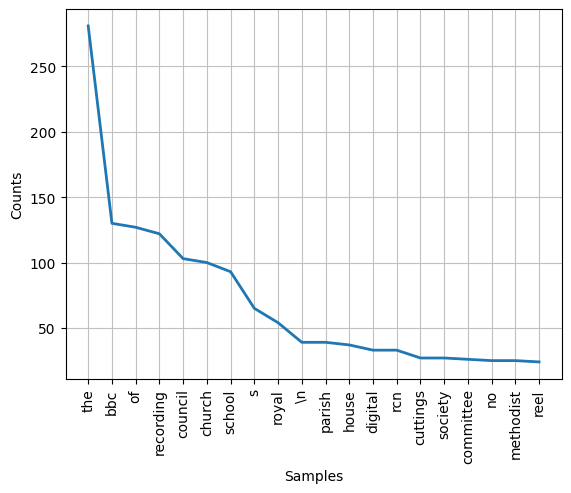

<Axes: xlabel='Samples', ylabel='Counts'>

In [47]:
from nltk import FreqDist

df_org = df_ent.loc[df_ent['Entity Type']=='ORG'].filter(['Text'])
df_org.head()

text_ent = df_org['Text'].str.replace(r'[^\w\s]+', '').str.lower().to_string()#to remove punctuation for the graph

tokens_ent = nltk.word_tokenize(text_ent)
fdist = FreqDist(tokens_ent)
fdist.plot(20)

# visualising organisations to show the most common. Although SpaCy classes recordings and cuttings as organisations, we can clearly see that councils, churches and schools are predominant.

In [48]:
#Spacy has an entity-ruler  that allows the addition of 'spans' or patterns to enhance the named entity recogniser, which can help improve accuracy
#It's possible to implement a rule-based entity recognition system with this method

import spacy
from spacy.lang.en import English
from spacy.tokens import span
from spacy.pipeline import EntityRuler

nlp = spacy.load("en_core_web_sm")
ruler = EntityRuler(nlp, overwrite_ents=True)
patterns = [{"label": "GPE", "pattern": "Australia"},
            {"label": "GPE", "pattern": "India"},
            {"label": "GPE", "pattern": "China"},
            {"label": "GPE", "pattern": "Asia"},
            {"label": "EVENT", "pattern": [{"LOWER": "expedition"}]},
            {"label": "EVENT", "pattern": [{"LOWER": "carnival"}]},
            {"label": "EVENT", "pattern": [{"LOWER": "protest"}]}]
ruler.add_patterns(patterns)
t_text = "Albums and loose photographs relating to the service of an unidentified soldier in China during the 1920s. Soldier possibly belonged to the Suffolk Regiment. Includes images of soldiers and civilians in China; celebration of Armistice Day in 1927; barricades and a protest; Japanese soldiers; Cantonese officers and men; American Marines and machine guns; a Jiu-Jitsu tournament; Indian police officers; British soldiers playing mah-jong; British soldiers relaxing off-duty; the aircraft Spirit of Canton flown by Chang Wai-jung; HMS SUFFOLK in China; visits to the zoo; Chinese funeral processions; Chinese Flight Officers; Shanghai; Nanking; Wei-Hai-Wei. Chinese street scenes; postcard views of Shanghai; Sikh police officer directing traffic. Loose formal postcard prints of unidentified British soldiers, possibly of the Suffolk Regiment. includes a notebook with comments on various places in Asia, Australia and Africa and a diary account of the return sea voyage from China to England."
#text taken from an accession description as a quick test of the model.
doc1 = nlp(t_text)
for ent in doc1.ents:
  if ent.label_ == "GPE":
    print((ent.text, ent.label_))




('China', 'GPE')
('China', 'GPE')
('Canton', 'GPE')
('China', 'GPE')
('Shanghai', 'GPE')
('Nanking', 'GPE')
('Shanghai', 'GPE')
('Australia', 'GPE')
('China', 'GPE')
('England', 'GPE')


In [49]:
# Spacy also allows phrase matching with similar results
import spacy
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher
from spacy.tokens import span
matcher = PhraseMatcher(nlp.vocab)
nlp = English()

new_events = [nlp.make_doc(text) for text in ('Expedition', 'Protest', 'Carnival')]
countries = [nlp.make_doc(text) for text in ('Australia', 'India', 'China', 'Asia')]

matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

matcher.add('EVENTS', None, *new_events)
matcher.add('GPE', None, *countries)

doc = nlp(all_text)

matches = matcher(doc)
for match_id, start, end in matches:
    rule_id = nlp.vocab.strings[match_id]  # get the unicode ID
    span = doc[start : end]
    print(rule_id, span.text, (match_id, start, end))

#https://stackoverflow.com/questions/47638877/using-phrasematcher-in-spacy-to-find-multiple-match-types

EVENTS expedition (11078960035478810202, 8344, 8345)
EVENTS Carnival (11078960035478810202, 30260, 30261)
EVENTS expedition (11078960035478810202, 46087, 46088)
GPE India (384, 51823, 51824)
EVENTS Protest (11078960035478810202, 53541, 53542)
EVENTS Carnival (11078960035478810202, 74268, 74269)
EVENTS Carnival (11078960035478810202, 76808, 76809)
GPE India (384, 80551, 80552)
GPE India (384, 118179, 118180)
GPE China (384, 130356, 130357)
GPE china (384, 139525, 139526)
GPE china (384, 140128, 140129)
GPE India (384, 142792, 142793)


In [ ]:
!pip uninstall neuralcoref
!pip install neuralcoref --no-binary neuralcoref

In [ ]:
#8. Coreference resolution:
#this is complex and requires more advanced machine learning. SpaCy does have a module for this,
#but dificult to test as it often crashes the colab

import spacy
nlp = spacy.load("en_core_web_sm")
import neuralcoref
coref = neuralcoref.NeuralCoref(nlp.vocab)
nlp.add_pipe(coref, name='neuralcoref')

doc = nlp(t_text)
doc._.coref_clusters

#https://spacy.io/universe/project/neuralcoref

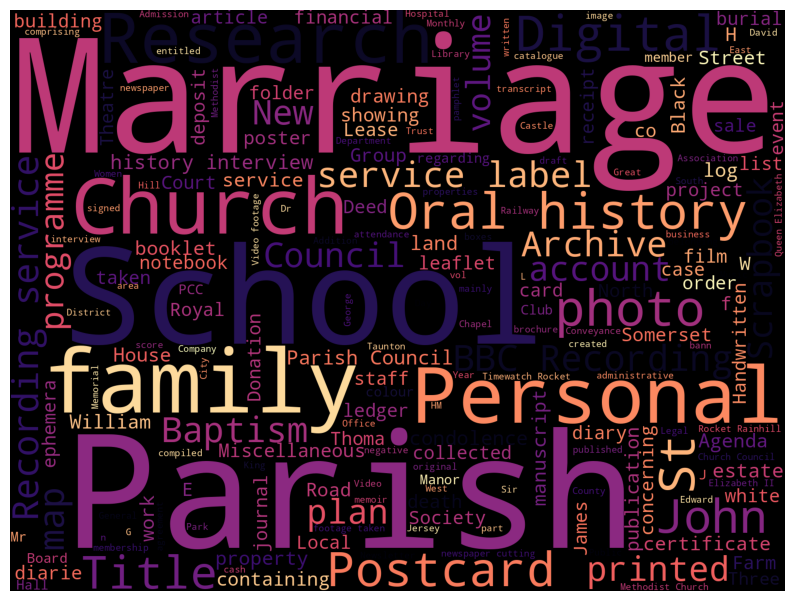

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=filestop, background_color='black', colormap='magma_r', width=1600, height=1200, max_words=200).generate(all_text)

plt.figure(figsize=(10,8), frameon=True)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# visualising the most common words in the accessions dataset